In [1]:
import tensorflow as tf
import numpy as np
import math
import os
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers.experimental import preprocessing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from os import listdir
from os.path import isfile, join
import pathlib

In [2]:
DATA_PATH = 'games_img/'
LISTED_DIR = list(set(os.listdir(DATA_PATH))-{'desktop.ini'})

In [3]:
images = list(set(os.listdir(DATA_PATH+'Game1'))-{'desktop.ini'})

In [4]:
images = [f for f in DATA_PATH if isfile(join(DATA_PATH+'Game1', f))]

In [5]:
images

[]

In [6]:
LISTED_DIR

['Game1', 'Game2', 'Game3']

In [7]:
images=[]
for i in LISTED_DIR:
    #images.append(sorted(filter(lambda x: isfile(join(DATA_PATH+i, x)), listdir(DATA_PATH+i))))
    aux = list(set(os.listdir(DATA_PATH+i))-{'desktop.ini'})
    #aux=i+aux
    aux.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    aux = [i+'/'+f for f in aux]
    images.append(aux)
images

[['Game1/screenshot5.png',
  'Game1/screenshot6.png',
  'Game1/screenshot7.png',
  'Game1/screenshot8.png',
  'Game1/screenshot9.png',
  'Game1/screenshot10.png',
  'Game1/screenshot11.png',
  'Game1/screenshot12.png',
  'Game1/screenshot13.png',
  'Game1/screenshot14.png',
  'Game1/screenshot15.png',
  'Game1/screenshot16.png',
  'Game1/screenshot17.png',
  'Game1/screenshot18.png',
  'Game1/screenshot19.png',
  'Game1/screenshot20.png',
  'Game1/screenshot21.png',
  'Game1/screenshot22.png',
  'Game1/screenshot23.png',
  'Game1/screenshot24.png',
  'Game1/screenshot25.png',
  'Game1/screenshot26.png',
  'Game1/screenshot28.png',
  'Game1/screenshot29.png',
  'Game1/screenshot30.png',
  'Game1/screenshot31.png',
  'Game1/screenshot32.png',
  'Game1/screenshot33.png',
  'Game1/screenshot34.png',
  'Game1/screenshot35.png',
  'Game1/screenshot38.png',
  'Game1/screenshot39.png',
  'Game1/screenshot40.png'],
 ['Game2/screenshot2.png',
  'Game2/screenshot3.png',
  'Game2/screenshot4.png',

In [8]:
cnn_model = models.load_model('cnn_progress')

In [9]:
smallestW = 57
smallestH = 60
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [smallestH, smallestW])

In [10]:
def predict_from_path(image_path):
    image = tf.io.read_file(image_path)
    image = decode_img(image)
    image = image/255.0
    image = tf.expand_dims(image, 0)
    
    
    prediction = cnn_model.predict(image)
    raw_pred = prediction
    
    #return raw_pred
    prediction = tf.argmax(prediction[0], axis=-1)
    
    return prediction

In [11]:
LABELS = listdir('sliced')
LABELS

['Adaptive_Talons',
 'Bane',
 'Bane_Nest',
 'Carapace_Upgrade',
 'Creep_Tumor',
 'Drone',
 'Evo_Chamber',
 'Extractor',
 'Flyer_Attacks',
 'Glial_Reconstitution',
 'Hatch',
 'Hive',
 'Hydra',
 'Hydra_Den',
 'Lair',
 'Ling',
 'Lurker',
 'Lurker_Den',
 'Melee_Attacks',
 'Metabolic_Boost',
 'Missile_Attacks',
 'Muta',
 'None',
 'Overlord',
 'Overseer',
 'Queen',
 'Ravager',
 'Roach',
 'Roach_Warren',
 'Seismic_Spines',
 'Spawning_Pool',
 'Spine_Crawler',
 'Spire',
 'Spore_Crawler']

Game1/screenshot5.png
Hatch


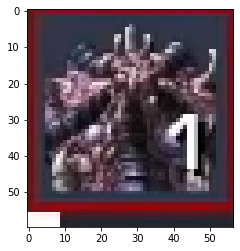




Drone


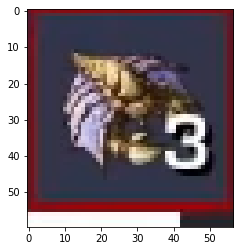




Game1/screenshot6.png
Extractor


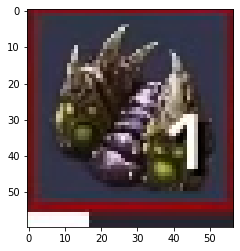




Spawning_Pool


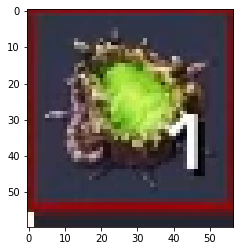




Hatch


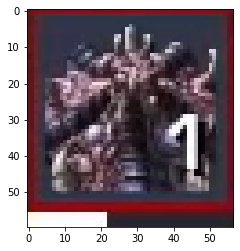




Game1/screenshot7.png
Spawning_Pool


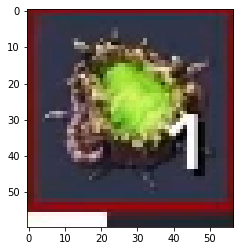




Hatch


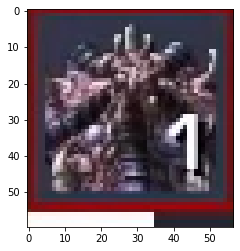




Drone


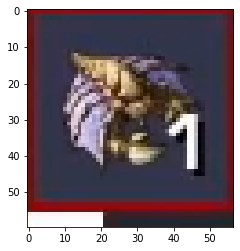




Game1/screenshot8.png
Spawning_Pool


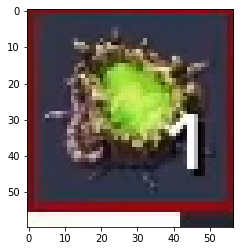




Hatch


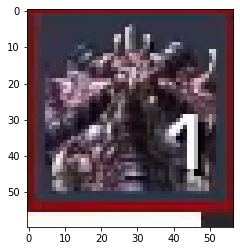




Drone


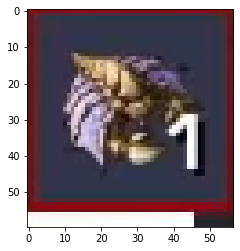




Game1/screenshot9.png
Ling


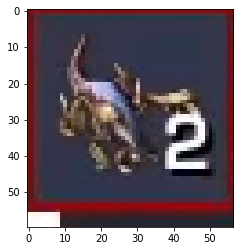




Overlord


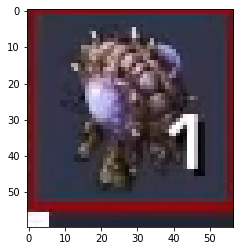




Queen


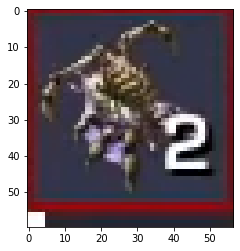




Game1/screenshot10.png
Drone


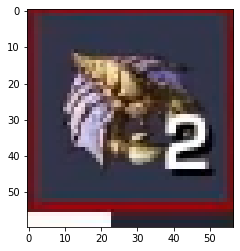




Queen


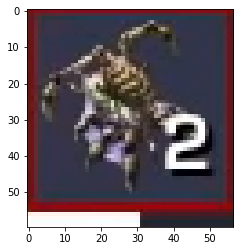




Metabolic_Boost


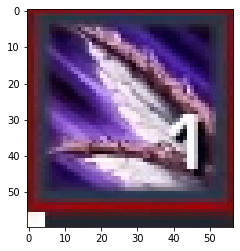




Game1/screenshot11.png
Ling


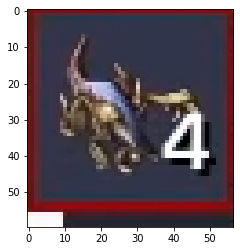




Queen


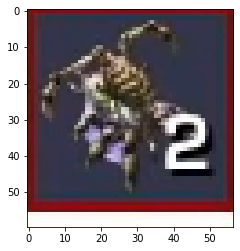




Metabolic_Boost


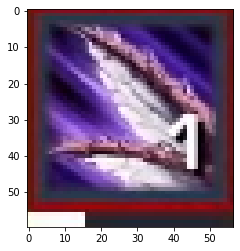




Game1/screenshot12.png
Bane_Nest


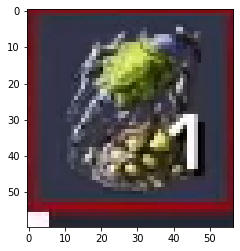




Hatch


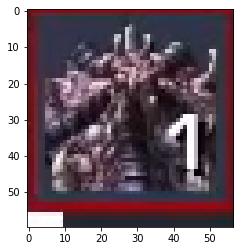




Drone


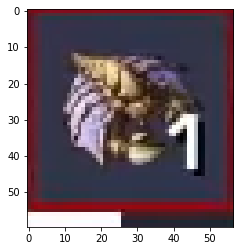




Overlord


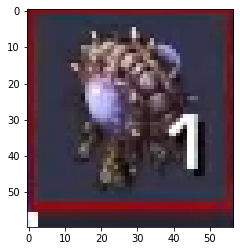




Metabolic_Boost


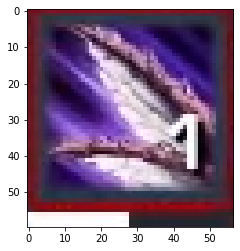




Game1/screenshot13.png
Bane_Nest


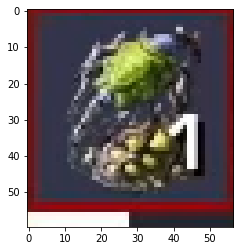




Hatch


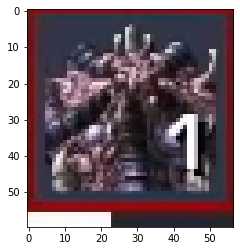




Drone


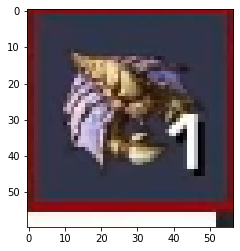




Ling


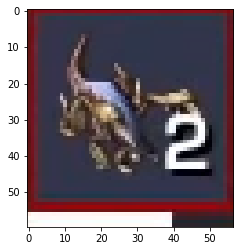




Overlord


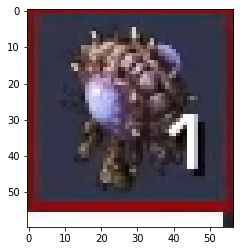




Queen


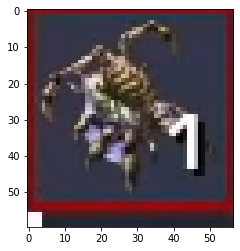




Metabolic_Boost


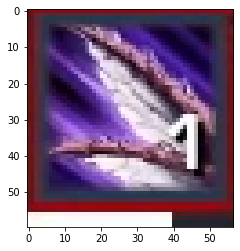




Game1/screenshot14.png
Bane_Nest


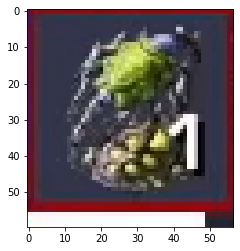




Hatch


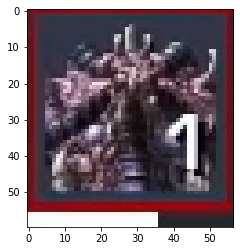




Drone


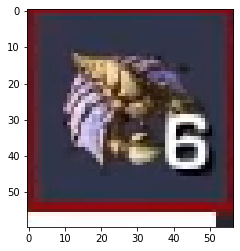




Ling


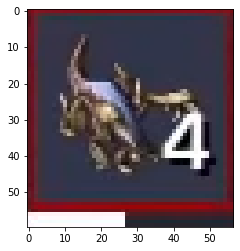




Queen


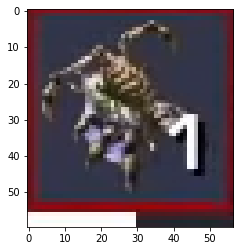




Metabolic_Boost


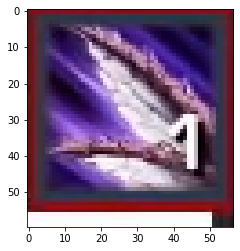




Game1/screenshot15.png
Hatch


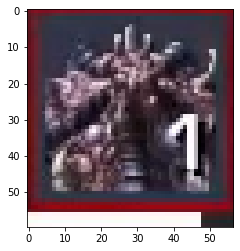




Overlord


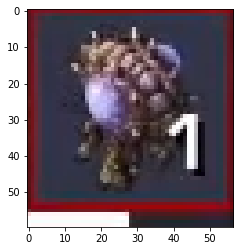




Bane


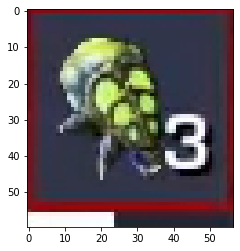




Queen


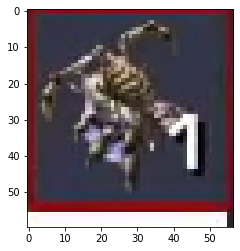




Game1/screenshot16.png
Creep_Tumor


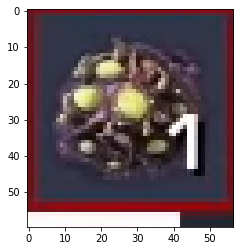




Evo_Chamber


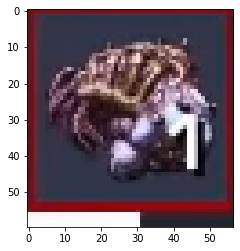




Drone


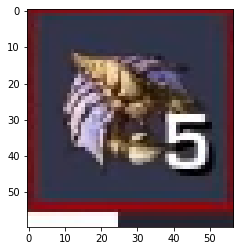




Ling


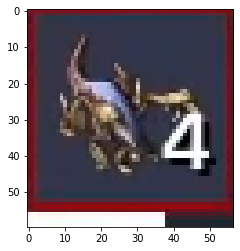




Overlord


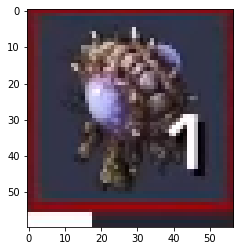




Game1/screenshot17.png
Ling


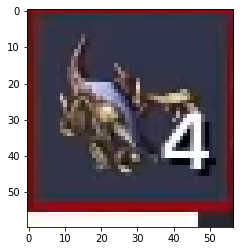




Overlord


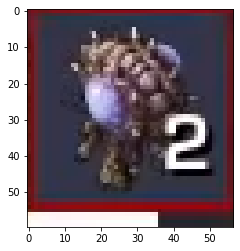




Melee_Attacks


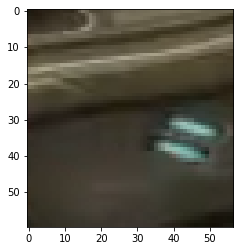

In [20]:
STARTING_HEIGHT = 57
STARTING_WIDTH = 48

PRODUCTION_HEIGHT = 60
PRODUCTION_WIDTH = 57


count=0

#for i in LISTED_DIR:
#    images = [f for f in LISTED_DIR if isfile(join(DATA_PATH, f))]

sequence = []
NEXT_PRODUCTION=63
for img_path in images:
    for f in img_path:
        print(f)
        img = mpimg.imread(join(DATA_PATH, f))
        
        for j in range(9):
            looping_width = STARTING_WIDTH + NEXT_PRODUCTION * j
            
            imgplot = plt.imshow(img[STARTING_HEIGHT:STARTING_HEIGHT+PRODUCTION_HEIGHT, looping_width:looping_width+PRODUCTION_WIDTH])
            
            plt.imsave('s0.png', img[STARTING_HEIGHT:STARTING_HEIGHT+PRODUCTION_HEIGHT, looping_width:looping_width+PRODUCTION_WIDTH])
            prediction = predict_from_path('s0.png')
            category = LABELS[prediction]
            if(category == 'None'):
                break
            print(category)
            sequence.append(category)
            plt.show()
            print('\n\n')
            count+=1
            if count==50:
                break
        if count==50:
            break
    if count==50:
        break

In [21]:
sequence

['Hatch',
 'Drone',
 'Extractor',
 'Spawning_Pool',
 'Hatch',
 'Spawning_Pool',
 'Hatch',
 'Drone',
 'Spawning_Pool',
 'Hatch',
 'Drone',
 'Ling',
 'Overlord',
 'Queen',
 'Drone',
 'Queen',
 'Metabolic_Boost',
 'Ling',
 'Queen',
 'Metabolic_Boost',
 'Bane_Nest',
 'Hatch',
 'Drone',
 'Overlord',
 'Metabolic_Boost',
 'Bane_Nest',
 'Hatch',
 'Drone',
 'Ling',
 'Overlord',
 'Queen',
 'Metabolic_Boost',
 'Bane_Nest',
 'Hatch',
 'Drone',
 'Ling',
 'Queen',
 'Metabolic_Boost',
 'Hatch',
 'Overlord',
 'Bane',
 'Queen',
 'Creep_Tumor',
 'Evo_Chamber',
 'Drone',
 'Ling',
 'Overlord',
 'Ling',
 'Overlord',
 'Melee_Attacks']